In [1169]:
import pandas as pd
import numpy as np
import statistics
import math
import matplotlib.pyplot as plt

In [1170]:
df = pd.read_csv('data.csv')
#pd.options.display.max_rows = 100

In [1171]:
#basically shows the data frame
#uncomment to see the data frame
#df

In [1172]:
#get the columns
df.columns

Index(['periodid', 'periodname', 'periodcode', 'perioddescription', 'dataid',
       'dataname', 'datacode', 'datadescription', 'Baringo County',
       'Bomet County', 'Bungoma County', 'Busia County',
       'Elgeyo Marakwet County', 'Embu County', 'Garissa County',
       'Homa Bay County', 'Isiolo County', 'Kajiado County', 'Kakamega County',
       'Kericho County', 'Kiambu County', 'Kilifi County', 'Kirinyaga County',
       'Kisii County', 'Kisumu County', 'Kitui County', 'Kwale County',
       'Laikipia County', 'Lamu County', 'Machakos County', 'Makueni County',
       'Mandera County', 'Marsabit County', 'Meru County', 'Migori County',
       'Mombasa County', 'Muranga County', 'Nairobi County', 'Nakuru County',
       'Nandi County', 'Narok County', 'Nyamira County', 'Nyandarua County',
       'Nyeri County', 'Samburu County', 'Siaya County', 'Taita Taveta County',
       'Tana River County', 'Tharaka Nithi County', 'Trans Nzoia County',
       'Turkana County', 'Uasin Gishu

In [1173]:
#get the info and shape
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   periodid                60 non-null     int64  
 1   periodname              60 non-null     object 
 2   periodcode              60 non-null     int64  
 3   perioddescription       0 non-null      float64
 4   dataid                  60 non-null     object 
 5   dataname                60 non-null     object 
 6   datacode                0 non-null      float64
 7   datadescription         0 non-null      float64
 8   Baringo County          60 non-null     float64
 9   Bomet County            60 non-null     float64
 10  Bungoma County          60 non-null     float64
 11  Busia County            60 non-null     float64
 12  Elgeyo Marakwet County  60 non-null     float64
 13  Embu County             59 non-null     float64
 14  Garissa County          60 non-null     floa

(60, 55)

In [1174]:
#rename the columns
new_names  = {"Baringo County": 'baringo', "Bomet County": 'bomet', "Bungoma County": 'bungoma', "Busia County": 'busia', "Elgeyo Marakwet County": 'elgeyo',
               "Embu County": 'embu', "Garissa County": 'garissa', "Homa Bay County": 'homabay', "Isiolo County": 'isiolo', "Kajiado County": 'kajiado',
                "Kakamega County": 'kakamega', "Kericho County": 'kericho', "Kiambu County": 'kiambu', "Kilifi County": 'kilifi', "Kirinyaga County": 'kirinyaga',
                "Kisii County": 'kisii', "Kisumu County": 'kisumu', "Kitui County": 'kitui', "Kwale County": 'kwale', "Laikipia County": 'laikipia', "Lamu County": 'lamu',
                "Machakos County": 'machakos', "Makueni County": 'makueni', "Mandera County": 'mandera', "Marsabit County": 'marsabit', "Meru County": 'meru', "Migori County": 'migori',
                "Mombasa County": 'mombasa', "Muranga County": 'muranga', "Nairobi County": 'nairobi', "Nakuru County": 'nakuru', "Nandi County": 'nandi', "Narok County": 'narok',
                "Nyamira County": 'nyamira', "Nyandarua County": 'nyandarua', "Nyeri County": 'nyeri', "Samburu County": 'samburu', "Siaya County": 'siaya', "Taita Taveta County": 'taita', 
                "Tana River County": 'tanariver', "Tharaka Nithi County": 'tharaka', "Trans Nzoia County": 'transzoia', "Turkana County": 'turkana', "Uasin Gishu County": 'uasingishu',
                "Vihiga County": 'vihiga', "Wajir County": 'wajir', "West Pokot County": 'westpokot'}

df.rename(columns=new_names, inplace=True)
#df['baringo']

In [1175]:
#get all period ids -> so as to get specific data in each county 
#with these ids we can get totals across months 
#1.per month first
period_ids  =  [ period for period in df['periodid']]
period_names = [ periodname for periodname in df['periodname']]

In [1176]:

#getting total nulls for each county
def check_null_values(county=None):
    if county == None:

        for k,v in new_names.items():
            total_null = df[v]
            print(f"{k} -> {total_null}")
    elif county != None:

        total_null = df[county]
        print(f"{county} has {total_null}s")

#check_null_values()



In [1177]:
#replace null value with means(0) assumption they weren't just sent
null_values = {}
def fillna(county=None):
    if county == None:
        for k,v in new_names.items():
            #get the total of missing values 
            total_null = [df[v] > 202]
            print(f"{k} -> {total_null}")
    elif county != None:

        total_null = df[county].isnull().sum()
        print(f"{county} has {total_null}s")
#fillna()

In [1232]:

#a function to dispaly total items per county 
#each county each period
county_monthly_consumption = []
county_names  = []
def all_items(county=None,periodid=None):
    county_monthly_consumption.clear()
    county_names.clear()
    try:
        if county == None and periodid == None:
            for periodid in period_ids:

                val = df.loc[df['periodid']==periodid].sum()

                for k,v in new_names.items():
                    #print(v)
                    commodity_total = val[v]
                    print(f"{v} has {commodity_total} kits in {periodid}")

        elif county == None and periodid != None:
    
            val = df.loc[df['periodid']==periodid].sum()

            for k,v in new_names.items():
                #print(v)
                commodity_total = val[v]
                county_monthly_consumption.append(commodity_total)
                county_names.append(v)#
                
                print(f"{v} has {commodity_total} kits in {periodid}")
            #print(county_monthly_consumption)

        elif county != None and periodid != None:

            val = df.loc[df['periodid']==periodid].sum()
        
            commodity_total = val[county]
            
            print(f"{county} has {commodity_total} kits in {periodid}")

        elif county != None:

            for periodid in period_ids:

                val = df.loc[df['periodid']==periodid].sum()

                commodity_total = val[county]
                print(f"{county} has {commodity_total} kits in {periodid}")

        else:

            print("A grave error, an error that should'nt occur has occurred!")

    except Exception as e:

        if e.__class__.__name__ == 'KeyError':
            print("An error occurred please report it out!")

#all_items()

baringo has 1113.0 kits in 201812
bomet has 1032.0 kits in 201812
bungoma has 13042.0 kits in 201812
busia has 34990.0 kits in 201812
elgeyo has 918.0 kits in 201812
embu has 808.0 kits in 201812
garissa has 622.0 kits in 201812
homabay has 23304.0 kits in 201812
isiolo has 285.0 kits in 201812
kajiado has 83.0 kits in 201812
kakamega has 47441.0 kits in 201812
kericho has 2158.0 kits in 201812
kiambu has 10.0 kits in 201812
kilifi has 27368.0 kits in 201812
kirinyaga has 54.0 kits in 201812
kisii has 2808.0 kits in 201812
kisumu has 29961.0 kits in 201812
kitui has 80.0 kits in 201812
kwale has 18491.0 kits in 201812
laikipia has 221.0 kits in 201812
lamu has 453.0 kits in 201812
machakos has 203.0 kits in 201812
makueni has 2026.0 kits in 201812
mandera has 0.0 kits in 201812
marsabit has 247.0 kits in 201812
meru has 448.0 kits in 201812
migori has 26068.0 kits in 201812
mombasa has 1349.0 kits in 201812
muranga has 0.0 kits in 201812
nairobi has 143.0 kits in 201812
nakuru has 791.

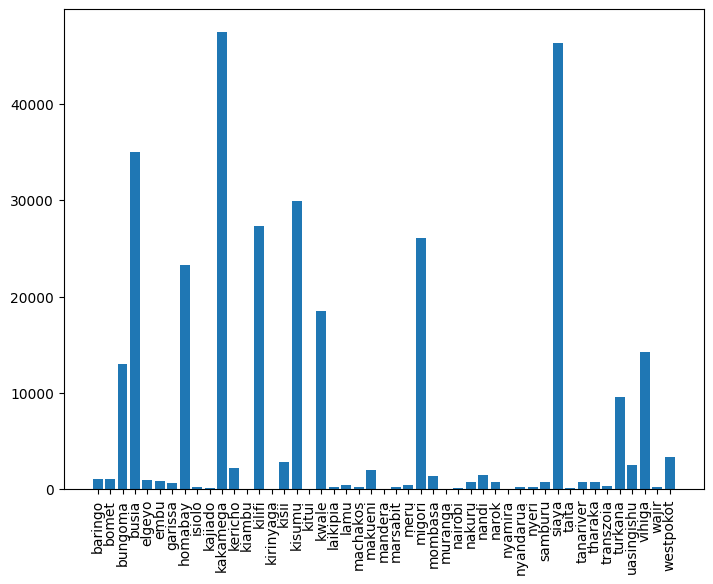

In [1238]:
#the following function plots the results per month against year
#X-axis has total number of commodities sent that year
#Y-axis has the counties 

#all_items(periodid=201801)
def per_year_plot(year):
    #get values for each county(y axis) in a list
    all_items(periodid=year)
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    langs = county_names
    students = county_monthly_consumption
    ax.bar(langs,students)
    plt.xticks(rotation=90)
    plt.show()
    

per_year_plot(201812)

In [1239]:
#get total, mean and median for every row (each  month begin from 202201 to 201812)
#ie summation across january on 2021 or accross feb
#import numpy to get mean
total_items_each_row = []
def total_items_per_row(period=None):
    total_items_each_row.clear()
    """if period == None:
        for periodid, periodname in zip(period_ids,period_names):
            row_data = df.loc[df['periodid']==periodid].sum()
            #get total for a particular period(month).....all months from 202201 to 201812
            for k,v in new_names.items():
                print(f"{k} has {row_data[v]} in {periodname}")
    elif period != None:"""
    try:
        row_data = df.loc[df['periodid'] == period].sum()
        
        for k,v in new_names.items():
                total_items_each_row.append(row_data[v])
        
        #print(statistics.fmean(total_items_each_row))
        total_items_per_period = np.sum(total_items_each_row)
        mean_total_items = np.mean(total_items_each_row)
        median_total_items = np.median(total_items_each_row)

        return {"sum": total_items_per_period, "mean": math.floor(mean_total_items), "median": median_total_items}

    except Exception as e:
         print("Wasn't supposed to happen!")
    
    #for count, value in enumerate(total_items_each_row):
    #     print(count, value)

#total_items_per_row(202201)

In [1240]:
#get total sum, mean and median per year
#the dict takes in a specific year and the total
years = [2018, 2019,2020,2021,2022]
yearly_report = {}
monthly_totals = []
def yearly_reports(year=None):
    
    #2022,2021,2020,2019,2018

    for year in years:
            #locate all rows with specific years
            total_mean = []
            total_sum = []
            total_median = []
            for period in period_ids:
                if str(period)[:4] == str(year):
                    values = total_items_per_row(period)
                    #print(period)
                    total_sum.append(values['sum'])
                    total_mean.append(values['mean'])
                    total_median.append(values['median'])
            
            sums = np.sum(total_sum)
            mean = np.sum(total_mean)
            median = np.sum(total_median)
           
            yearly_report[year] = {"sum": sums, "mean": mean, "median": median}
    #print(yearly_report)

yearly_reports()
    

In [1241]:
##get summation of the total in all those years present
summation = {}
def year_summation():
    #loop through yearly reports to get general total supplied for the past 5 years
    sums = []
    mean = []
    median = []
    for k,v in yearly_report.items():

        sums.append(v['sum'])
        mean.append(v['mean'])
        median.append(v['median'])

    summation_of_sums = np.sum(sums)
    summation_of_mean = np.sum(mean)
    summation_of_median = np.sum(median)

    summation['all_annual_total'] = {'annual_total': summation_of_sums,
                                      'annual_mean': summation_of_mean,
                                      'annual_median': summation_of_median,
                                      } 
    
year_summation()

baringo has 2644.0 kits in 202201
bomet has 626.0 kits in 202201
bungoma has 24500.0 kits in 202201
busia has 46485.0 kits in 202201
elgeyo has 2055.0 kits in 202201
embu has 874.0 kits in 202201
garissa has 1003.0 kits in 202201
homabay has 50250.0 kits in 202201
isiolo has 116.0 kits in 202201
kajiado has 1673.0 kits in 202201
kakamega has 60594.0 kits in 202201
kericho has 177.0 kits in 202201
kiambu has 306.0 kits in 202201
kilifi has 33067.0 kits in 202201
kirinyaga has 112.0 kits in 202201
kisii has 7905.0 kits in 202201
kisumu has 43045.0 kits in 202201
kitui has 2040.0 kits in 202201
kwale has 38028.0 kits in 202201
laikipia has 330.0 kits in 202201
lamu has 568.0 kits in 202201
machakos has 565.0 kits in 202201
makueni has 3672.0 kits in 202201
mandera has 34.0 kits in 202201
marsabit has 445.0 kits in 202201
meru has 2773.0 kits in 202201
migori has 63834.0 kits in 202201
mombasa has 2864.0 kits in 202201
muranga has 24.0 kits in 202201
nairobi has 3519.0 kits in 202201
nakur

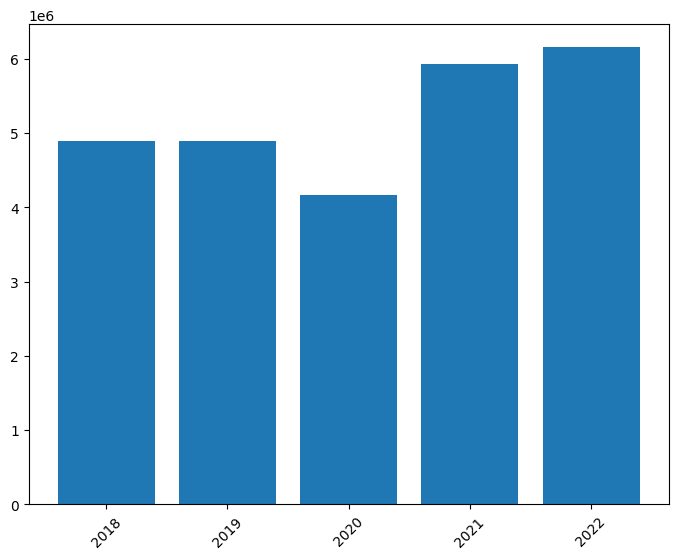

In [1242]:
#the following function plots the results for each year since 2018 - 2022
#X-axis has the years
#Y-axis has the value in those respective years

#all_items(periodid=201801)
def years_distribution_plot(year=None):
    year_values = []
    years = [] 
    for k,v in yearly_report.items():
        year_values.append(v['sum'])
        years.append(k)
    #print(year_values)
    #get values for each county(y axis) in a list
    all_items(periodid=year)
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(years,year_values)
    plt.xticks(rotation=45)
    plt.show()
    

years_distribution_plot()